# Iris Flower Classification

Load the Iris dataset from scikit-learn.

In [66]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = load_iris()
iris = pd.DataFrame(data=df.data, columns=df.feature_names)
iris['target'] = df.target

## checking the dataset

In [67]:

# 1. Basic Information
print("Shape of the dataset:", iris.shape)
print("\nColumns in the dataset:\n", iris.columns)
print("\nData types of each column:\n", iris.dtypes)
print("\nBasic info of the dataset:\n")
iris.info()

# 2. Summary Statistics
print("\nSummary statistics of the dataset:\n")
print(iris.describe())

# 3. Check for Missing Values
print("\nMissing values in each column:\n")
print(iris.isnull().sum())

# 4. Unique Values and Value Counts for Categorical Data
# Assuming 'target' is a categorical column
print("\nUnique values in 'target' column:\n", iris['target'].unique())
print("\nValue counts for 'target' column:\n", iris['target'].value_counts())

# 5. Correlation Matrix
print("\nCorrelation matrix:\n")
print(iris.corr())

Shape of the dataset: (150, 5)

Columns in the dataset:
 Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

Data types of each column:
 sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

Basic info of the dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB

Summary statistics of the dataset:

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count

Explore the dataset and visualize it using matplotlib or seaborn.

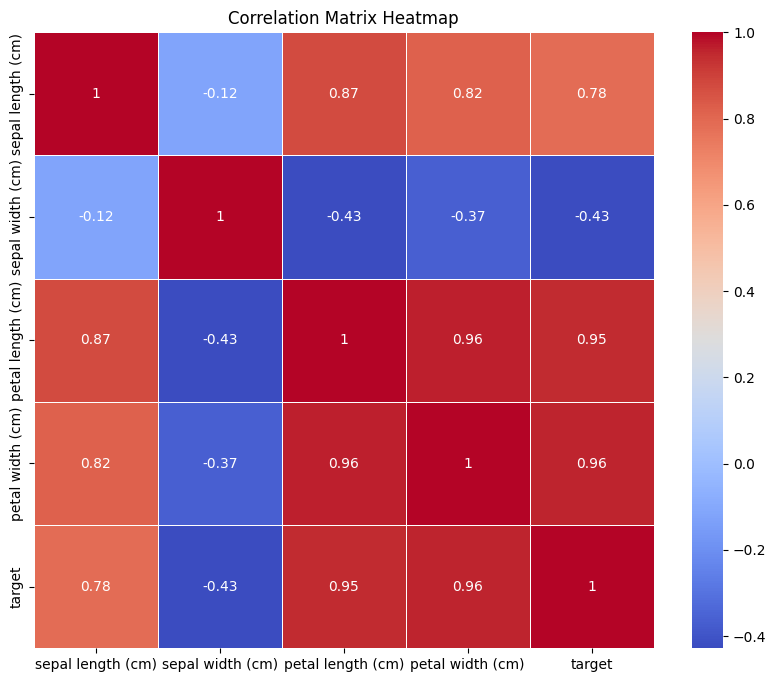

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(iris.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Pairplot

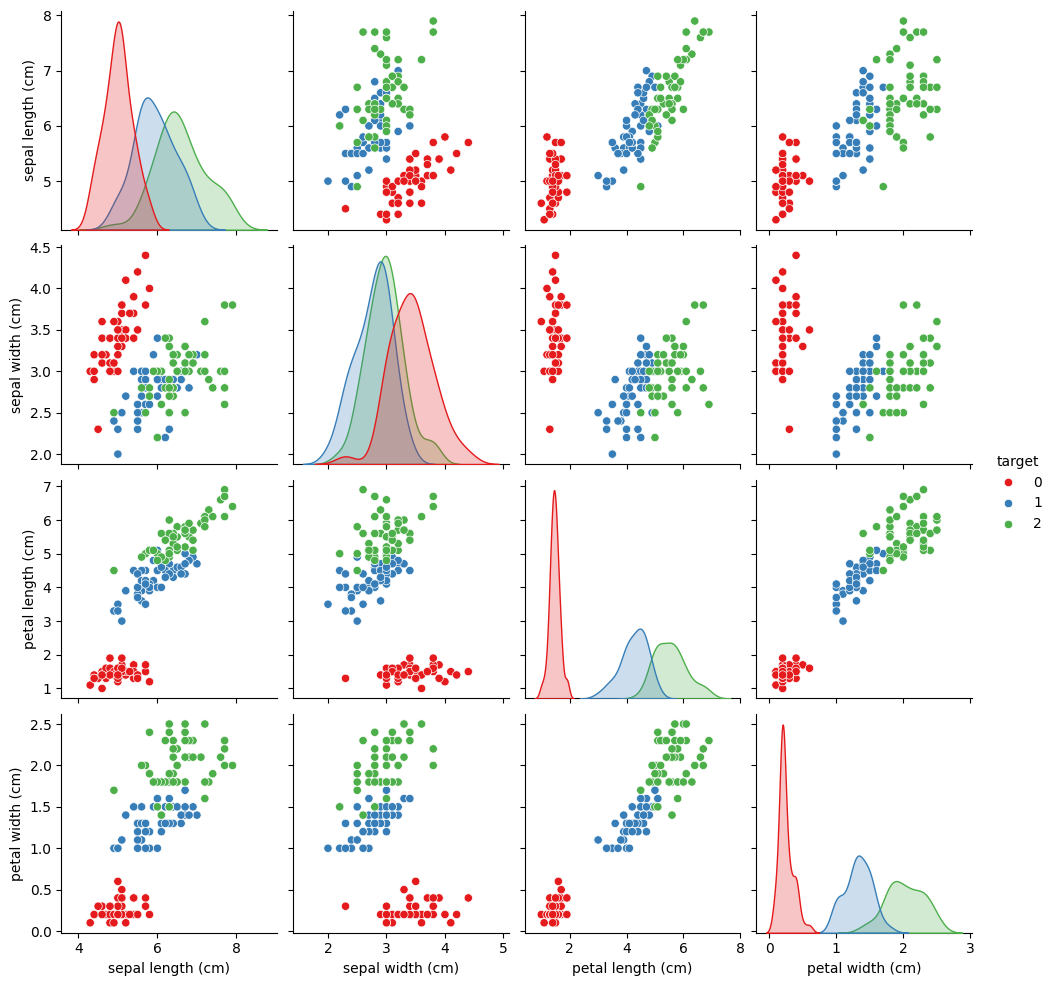

In [69]:
sns.pairplot(iris, hue='target', vars=[
             'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'], palette='Set1')

Histogram

<Figure size 1000x800 with 0 Axes>

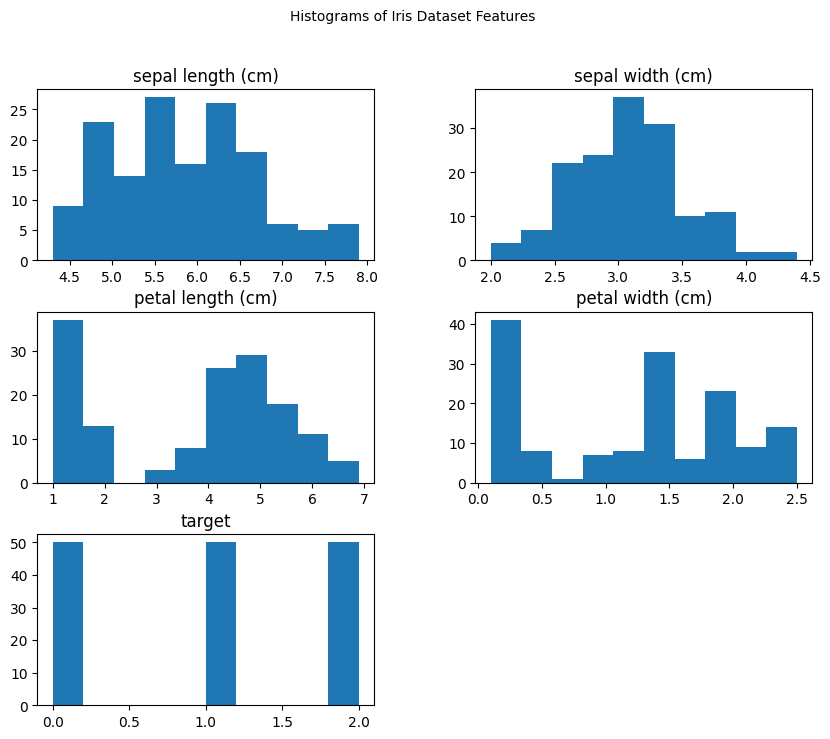

In [70]:
plt.figure(figsize=(10,8))
iris.hist(figsize=(10, 8),grid=False)
plt.suptitle("Histograms of Iris Dataset Features", size=10)
plt.show()

Scatter plot

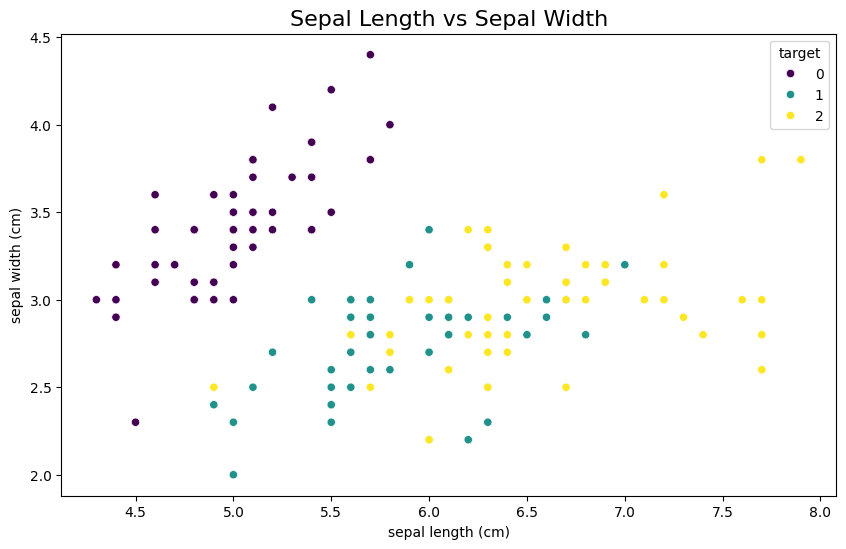

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)',
                hue='target', data=iris, palette='viridis')
plt.title("Sepal Length vs Sepal Width", size=16)
plt.show()

Box Plot

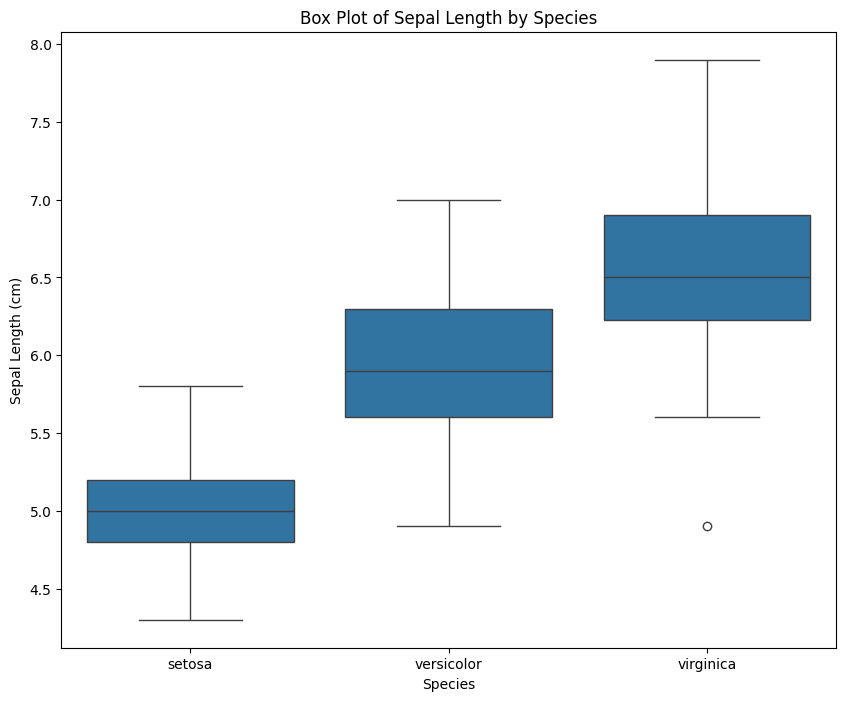

In [72]:
plt.figure(figsize=(10,8))
sns.boxplot(x='target', y='sepal length (cm)', data=iris)
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.title('Box Plot of Sepal Length by Species')
plt.xticks(ticks=[0, 1, 2], labels=['setosa', 'versicolor', 'virginica'])
plt.show()

## Split the data into training and testing sets.

In [76]:
X = df.data  # Features
y = df.target  # Labels
train_X , test_X , train_y , test_y = train_test_split(X,y, test_size=0.2, random_state=0)

K-nearest neighbors

In [77]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_X,train_y)

KNeighborsClassifier(n_neighbors=3)

## Evaluate model

In [80]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

predictions = neigh.predict(test_X)

accuracy = accuracy_score(test_y,predictions)
conf_matrix = confusion_matrix(test_y, predictions)
class_report = classification_report(test_y, predictions)

print(f"Accuracy: {accuracy}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9666666666666667

Confusion Matrix:
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.92      0.96        13
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



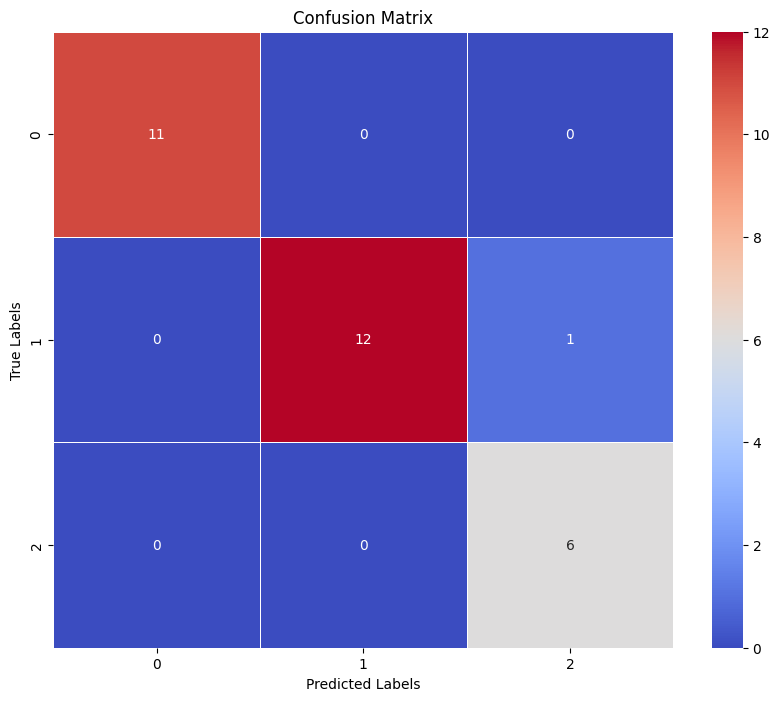

In [85]:
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()